In [5]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt
import pickle
import os

In [2]:
sid = ['/media/siddharth/New Volume/Github/My Analysis - SF/USA_AK_Anchorage.Intl.AP.702730_TMY3_BASE.csv',
       '/media/siddharth/New Volume/Github/My Analysis - SF/Anchorage_Weather.csv']

dk = ['/Volumes/ADITHYA/Adithya/ML materials/DATA SETS/TMY3 /USA_AK_Anchorage.Intl.AP.702730_TMY3_BASE.csv', 
      '/Volumes/ADITHYA/Adithya/ML materials/DATA SETS/TMY3 /USA_AK_Anchorage.Intl.AP.Weather.CSV']
path = dk[0] if("adithya" in os.getlogin()) else sid[0]
path_weather = dk[1] if("adithya" in os.getlogin()) else sid[1]

In [3]:
df=pd.read_csv(path)
#print df.head(3),"\n"
df_weather = pd.read_csv(path_weather,header=1)

In [4]:
df_set= df['Electricity:Facility [kW](Hourly)']
values = pd.DataFrame(df_set.values)


dataframe = pd.concat([values.shift(2),values.shift(1), values], axis=1)
#above line is same as dataframe = np.hstack( (np.hstack(( values[2:], values[1:-2])) , values[:-3] ) )

dataframe.columns = ['t-2', 't-1','t']

# To remove the NaN values
dataframe= pd.DataFrame(dataframe[2:])

scaler = StandardScaler()
scaler.fit(dataframe.values)

#print dataframe

x = dataframe.loc[:,'t-2':'t-1']
y = pd.DataFrame(dataframe.loc[:,'t'])

print x.head(4)
y.columns = ['t']
print y.head(4)

        t-2       t-1
2  1.019364  0.887116
3  0.887116  0.833463
4  0.833463  0.818020
5  0.818020  0.812916
          t
2  0.833463
3  0.818020
4  0.812916
5  0.865135


In [5]:
X_train,X_test,y_train,y_test = train_test_split(x.values,y.values,test_size=0.2,random_state=1)

In [6]:
#scaler.transform(X_train)
#scaler.transform(X_test)
len(y_train)
len(y_test)
X_train = np.concatenate([X_train,X_test],axis=0)
y_train = np.concatenate([y_train,y_test],axis=0)

In [7]:
X_train[0]

array([ 1.24551648,  0.9399456 ])

Train on 7006 samples, validate on 1752 samples
Epoch 1/10
0s - loss: 1.2487 - mean_squared_error: 1.2487 - val_loss: 1.1996 - val_mean_squared_error: 1.1996
Epoch 2/10
0s - loss: 1.1308 - mean_squared_error: 1.1308 - val_loss: 1.0706 - val_mean_squared_error: 1.0706
Epoch 3/10
0s - loss: 0.9862 - mean_squared_error: 0.9862 - val_loss: 0.9067 - val_mean_squared_error: 0.9067
Epoch 4/10
0s - loss: 0.8142 - mean_squared_error: 0.8142 - val_loss: 0.7313 - val_mean_squared_error: 0.7313
Epoch 5/10
0s - loss: 0.6483 - mean_squared_error: 0.6483 - val_loss: 0.5807 - val_mean_squared_error: 0.5807
Epoch 6/10
0s - loss: 0.5178 - mean_squared_error: 0.5178 - val_loss: 0.4714 - val_mean_squared_error: 0.4714
Epoch 7/10
0s - loss: 0.4252 - mean_squared_error: 0.4252 - val_loss: 0.3963 - val_mean_squared_error: 0.3963
Epoch 8/10
0s - loss: 0.3621 - mean_squared_error: 0.3621 - val_loss: 0.3450 - val_mean_squared_error: 0.3450
Epoch 9/10
0s - loss: 0.3186 - mean_squared_error: 0.3186 - val_loss: 0.

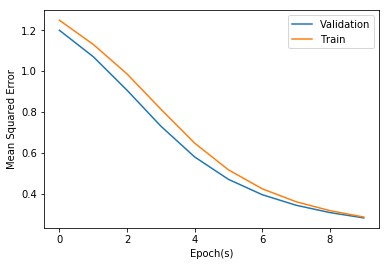

Train on 7006 samples, validate on 1752 samples
Epoch 1/10
0s - loss: 0.4678 - mean_squared_error: 0.4678 - val_loss: 0.4672 - val_mean_squared_error: 0.4672
Epoch 2/10
0s - loss: 0.4474 - mean_squared_error: 0.4474 - val_loss: 0.4468 - val_mean_squared_error: 0.4468
Epoch 3/10
0s - loss: 0.4267 - mean_squared_error: 0.4267 - val_loss: 0.4257 - val_mean_squared_error: 0.4257
Epoch 4/10
0s - loss: 0.4054 - mean_squared_error: 0.4054 - val_loss: 0.4039 - val_mean_squared_error: 0.4039
Epoch 5/10
0s - loss: 0.3836 - mean_squared_error: 0.3836 - val_loss: 0.3822 - val_mean_squared_error: 0.3822
Epoch 6/10
0s - loss: 0.3624 - mean_squared_error: 0.3624 - val_loss: 0.3614 - val_mean_squared_error: 0.3614
Epoch 7/10
0s - loss: 0.3421 - mean_squared_error: 0.3421 - val_loss: 0.3419 - val_mean_squared_error: 0.3419
Epoch 8/10
0s - loss: 0.3238 - mean_squared_error: 0.3238 - val_loss: 0.3244 - val_mean_squared_error: 0.3244
Epoch 9/10
0s - loss: 0.3071 - mean_squared_error: 0.3071 - val_loss: 0.

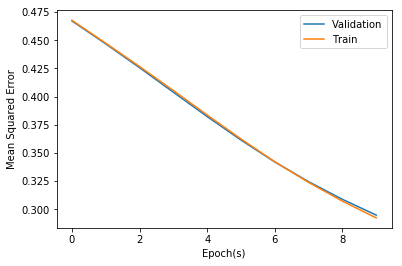

Train on 7006 samples, validate on 1752 samples
Epoch 1/10
0s - loss: 0.4654 - mean_squared_error: 0.4654 - val_loss: 0.4673 - val_mean_squared_error: 0.4673
Epoch 2/10
0s - loss: 0.4494 - mean_squared_error: 0.4494 - val_loss: 0.4509 - val_mean_squared_error: 0.4509
Epoch 3/10
0s - loss: 0.4327 - mean_squared_error: 0.4327 - val_loss: 0.4337 - val_mean_squared_error: 0.4337
Epoch 4/10
0s - loss: 0.4150 - mean_squared_error: 0.4150 - val_loss: 0.4155 - val_mean_squared_error: 0.4155
Epoch 5/10
0s - loss: 0.3966 - mean_squared_error: 0.3966 - val_loss: 0.3970 - val_mean_squared_error: 0.3970
Epoch 6/10
0s - loss: 0.3781 - mean_squared_error: 0.3781 - val_loss: 0.3781 - val_mean_squared_error: 0.3781
Epoch 7/10
0s - loss: 0.3591 - mean_squared_error: 0.3591 - val_loss: 0.3590 - val_mean_squared_error: 0.3590
Epoch 8/10
0s - loss: 0.3404 - mean_squared_error: 0.3404 - val_loss: 0.3402 - val_mean_squared_error: 0.3402
Epoch 9/10
0s - loss: 0.3218 - mean_squared_error: 0.3218 - val_loss: 0.

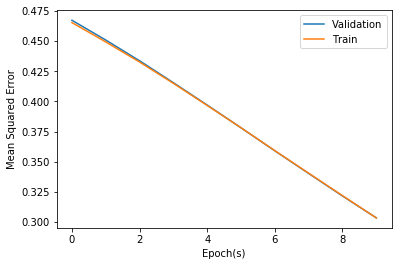

Train on 7006 samples, validate on 1752 samples
Epoch 1/10
0s - loss: 1.2326 - mean_squared_error: 1.2326 - val_loss: 1.1807 - val_mean_squared_error: 1.1807
Epoch 2/10
0s - loss: 1.0968 - mean_squared_error: 1.0968 - val_loss: 1.0145 - val_mean_squared_error: 1.0145
Epoch 3/10
0s - loss: 0.9060 - mean_squared_error: 0.9060 - val_loss: 0.7989 - val_mean_squared_error: 0.7989
Epoch 4/10
0s - loss: 0.6806 - mean_squared_error: 0.6806 - val_loss: 0.5663 - val_mean_squared_error: 0.5663
Epoch 5/10
0s - loss: 0.4607 - mean_squared_error: 0.4607 - val_loss: 0.3617 - val_mean_squared_error: 0.3617
Epoch 6/10
0s - loss: 0.2806 - mean_squared_error: 0.2806 - val_loss: 0.2098 - val_mean_squared_error: 0.2098
Epoch 7/10
0s - loss: 0.1590 - mean_squared_error: 0.1590 - val_loss: 0.1201 - val_mean_squared_error: 0.1201
Epoch 8/10
0s - loss: 0.0948 - mean_squared_error: 0.0948 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 9/10
0s - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.

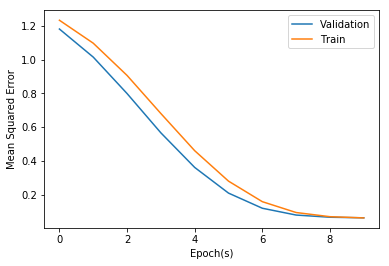

Train on 7006 samples, validate on 1752 samples
Epoch 1/10
0s - loss: 1.2834 - mean_squared_error: 1.2834 - val_loss: 1.2943 - val_mean_squared_error: 1.2943
Epoch 2/10
0s - loss: 1.2834 - mean_squared_error: 1.2834 - val_loss: 1.2943 - val_mean_squared_error: 1.2943
Epoch 3/10
0s - loss: 1.2834 - mean_squared_error: 1.2834 - val_loss: 1.2943 - val_mean_squared_error: 1.2943
Epoch 4/10
0s - loss: 1.2834 - mean_squared_error: 1.2834 - val_loss: 1.2943 - val_mean_squared_error: 1.2943
Epoch 5/10
0s - loss: 1.2834 - mean_squared_error: 1.2834 - val_loss: 1.2943 - val_mean_squared_error: 1.2943
Epoch 6/10
0s - loss: 1.2834 - mean_squared_error: 1.2834 - val_loss: 1.2943 - val_mean_squared_error: 1.2943
Epoch 7/10
0s - loss: 1.2834 - mean_squared_error: 1.2834 - val_loss: 1.2943 - val_mean_squared_error: 1.2943
Epoch 8/10
0s - loss: 1.2834 - mean_squared_error: 1.2834 - val_loss: 1.2943 - val_mean_squared_error: 1.2943
Epoch 9/10
0s - loss: 1.2834 - mean_squared_error: 1.2834 - val_loss: 1.

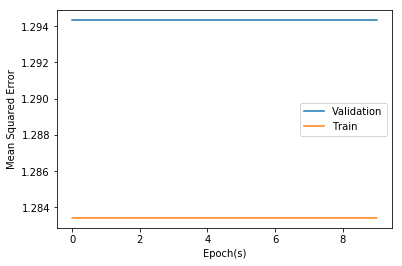

In [8]:

#To input to the model, the pixels need to be converted to a 28 x 28
#i.e. 784 length vector.
'''Flatten 28 x 28 images to a 784 vector for each image.'''
#num_pixels = X_train.shape[1]*X_train.shape[2]
num_pixels=2

#X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
#X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

#Scaling (range [0,1] )
#X_train = X_train*1.0/255
#X_test = X_test*1.0/255

#One-hot encode the outputs.
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#num_classes = y_test.shape[1]
num_classes=1

#define baseline model.
def baseline_model():
    #Create model.
    model = Sequential()
    #Hidden Layer.
    '''It means that the input_dim is the size of the input, and the 
       the num_pixels is the number of neurons in the first hidden layer.  
    '''
    model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation=i))
    #Output Layer.
    model.add(Dense(num_classes,kernel_initializer='normal',activation=i))
    #Compile model.
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
    return model

activations = ['tanh','sigmoid','hard_sigmoid','linear','relu']
for i in activations:
    #Build the model.
    model = baseline_model()
    #Fit the model.
    history = model.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
    print ("Model : ",i)
    print history.history['val_loss']
    
    p1, = plt.plot(history.history['val_loss'])
    p2, = plt.plot(history.history['loss'])
    plt.xlabel("Epoch(s)")
    plt.ylabel("Mean Squared Error")
    plt.legend([p1,p2],['Validation','Train'])
    plt.show()
    #model.summary()

    #Final Evaluation of the model.
    #scores = model.evaluate(X_test,y_test,verbose=0)
    #print ("Model : ",i)
    #print ("Score : %.5f" % (100-scores[1]*100)),"\n\n"

Train on 7006 samples, validate on 1752 samples
Epoch 1/100
0s - loss: 1.1037 - mean_squared_error: 1.1037 - val_loss: 0.9102 - val_mean_squared_error: 0.9102
Epoch 2/100
0s - loss: 0.7144 - mean_squared_error: 0.7144 - val_loss: 0.5167 - val_mean_squared_error: 0.5167
Epoch 3/100
0s - loss: 0.3542 - mean_squared_error: 0.3542 - val_loss: 0.2112 - val_mean_squared_error: 0.2112
Epoch 4/100
0s - loss: 0.1325 - mean_squared_error: 0.1325 - val_loss: 0.0855 - val_mean_squared_error: 0.0855
Epoch 5/100
0s - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.0725 - val_mean_squared_error: 0.0725
Epoch 6/100
0s - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0622 - val_mean_squared_error: 0.0622
Epoch 7/100
0s - loss: 0.0560 - mean_squared_error: 0.0560 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 8/100
0s - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 9/100
0s - loss: 0.0456 - mean_squared_error: 0.0456 - val

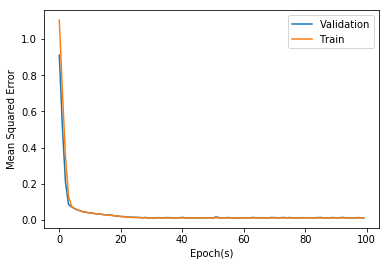

Train on 7006 samples, validate on 1752 samples
Epoch 1/100
0s - loss: 0.9997 - mean_squared_error: 0.9997 - val_loss: 0.6953 - val_mean_squared_error: 0.6953
Epoch 2/100
0s - loss: 0.4461 - mean_squared_error: 0.4461 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 3/100
0s - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.0732 - val_mean_squared_error: 0.0732
Epoch 4/100
0s - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0635 - val_mean_squared_error: 0.0635
Epoch 5/100
0s - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 6/100
0s - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 7/100
0s - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 8/100
0s - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 9/100
0s - loss: 0.0382 - mean_squared_error: 0.0382 - val

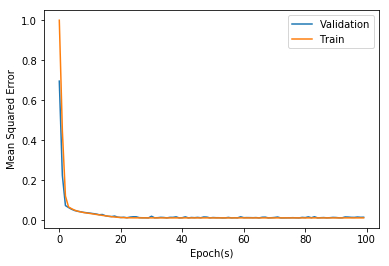

Train on 7006 samples, validate on 1752 samples
Epoch 1/100
0s - loss: 1.0192 - mean_squared_error: 1.0192 - val_loss: 0.7799 - val_mean_squared_error: 0.7799
Epoch 2/100
0s - loss: 0.5825 - mean_squared_error: 0.5825 - val_loss: 0.4048 - val_mean_squared_error: 0.4048
Epoch 3/100
0s - loss: 0.2825 - mean_squared_error: 0.2825 - val_loss: 0.1903 - val_mean_squared_error: 0.1903
Epoch 4/100
0s - loss: 0.1434 - mean_squared_error: 0.1434 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 5/100
0s - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.1162 - val_mean_squared_error: 0.1162
Epoch 6/100
0s - loss: 0.1056 - mean_squared_error: 0.1056 - val_loss: 0.1051 - val_mean_squared_error: 0.1051
Epoch 7/100
0s - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.0907 - val_mean_squared_error: 0.0907
Epoch 8/100
0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0749 - val_mean_squared_error: 0.0749
Epoch 9/100
0s - loss: 0.0661 - mean_squared_error: 0.0661 - val

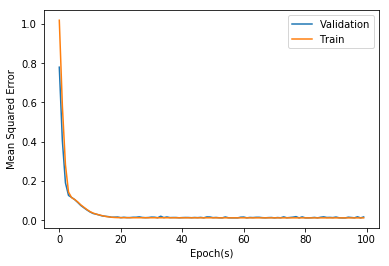

Train on 7006 samples, validate on 1752 samples
Epoch 1/100
0s - loss: 1.1363 - mean_squared_error: 1.1363 - val_loss: 1.0300 - val_mean_squared_error: 1.0300
Epoch 2/100
0s - loss: 0.9309 - mean_squared_error: 0.9309 - val_loss: 0.8474 - val_mean_squared_error: 0.8474
Epoch 3/100
0s - loss: 0.7585 - mean_squared_error: 0.7585 - val_loss: 0.6863 - val_mean_squared_error: 0.6863
Epoch 4/100
0s - loss: 0.6096 - mean_squared_error: 0.6096 - val_loss: 0.5475 - val_mean_squared_error: 0.5475
Epoch 5/100
0s - loss: 0.4821 - mean_squared_error: 0.4821 - val_loss: 0.4339 - val_mean_squared_error: 0.4339
Epoch 6/100
0s - loss: 0.3774 - mean_squared_error: 0.3774 - val_loss: 0.3406 - val_mean_squared_error: 0.3406
Epoch 7/100
0s - loss: 0.2945 - mean_squared_error: 0.2945 - val_loss: 0.2687 - val_mean_squared_error: 0.2687
Epoch 8/100
0s - loss: 0.2331 - mean_squared_error: 0.2331 - val_loss: 0.2180 - val_mean_squared_error: 0.2180
Epoch 9/100
0s - loss: 0.1925 - mean_squared_error: 0.1925 - val

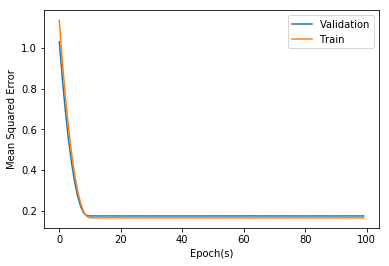

In [9]:
#Parameters of the ReLUs need to be looked into and played around. 
advanced_relu = ['model.add(LeakyReLU(alpha=0.003))','model.add(PReLU(alpha_initializer="zeros"))','model.add(ELU())',
                 'model.add(ThresholdedReLU(theta=0.05))']
opzr=RMSprop(lr=3e-3)
for i in advanced_relu:
    #Create model.
    model = Sequential()
    #Hidden Layer.
    '''It means that the input_dim is the size of the input, and the 
    the num_pixels is the number of neurons in the first hidden layer.  
    '''
    model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation='linear'))
    #Output Layer.
    #model.add(LeakyReLU(alpha=0.003))
    exec(i)
    model.add(Dense(num_classes,kernel_initializer='normal',activation='linear'))
    #Compile model.
    model.compile(loss='mean_squared_error',optimizer=opzr,metrics=['mean_squared_error'])

    history = model.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=200,verbose=2)
    print ("Model : ",i)
    print history.history['val_loss']

    p1, = plt.plot(history.history['val_loss'])
    p2, = plt.plot(history.history['loss'])
    plt.xlabel("Epoch(s)")
    plt.ylabel("Mean Squared Error")
    plt.legend([p1,p2],['Validation','Train'])
    plt.show()


In [10]:
X_train[:3]

array([[ 1.24551648,  0.9399456 ],
       [ 0.79024752,  1.00582298],
       [ 0.89470353,  1.10083911]])

In [11]:
df.dtypes

Date/Time                                           object
Electricity:Facility [kW](Hourly)                  float64
Gas:Facility [kW](Hourly)                          float64
Heating:Electricity [kW](Hourly)                     int64
Heating:Gas [kW](Hourly)                           float64
Cooling:Electricity [kW](Hourly)                     int64
HVACFan:Fans:Electricity [kW](Hourly)              float64
Electricity:HVAC [kW](Hourly)                      float64
Fans:Electricity [kW](Hourly)                      float64
General:InteriorLights:Electricity [kW](Hourly)    float64
General:ExteriorLights:Electricity [kW](Hourly)    float64
Appl:InteriorEquipment:Electricity [kW](Hourly)    float64
Misc:InteriorEquipment:Electricity [kW](Hourly)    float64
Water Heater:WaterSystems:Gas [kW](Hourly)         float64
dtype: object

In [12]:
#London Dataset.
#60-min. and 1-min.
d60 = pd.read_csv("/media/siddharth/New Volume/Github/TherML Data/Open Power System Data/opsd-household_data-2017-09-01/household_data_60min_singleindex.csv",header=0)
d1 = pd.read_csv("/media/siddharth/New Volume/Github/TherML Data/Open Power System Data/opsd-household_data-2017-09-01/household_data_1min_singleindex.csv",header=0)
d3 = pd.read_csv("/media/siddharth/New Volume/Github/TherML Data/Open Power System Data/opsd-household_data-2017-09-01/household_data_3min_singleindex.csv",header=0)
d15 = pd.read_csv("/media/siddharth/New Volume/Github/TherML Data/Open Power System Data/opsd-household_data-2017-09-01/household_data_15min_singleindex.csv",header=0)

In [13]:
#del d60['interpolated_values']
d60.tail(4)

,utc_timestamp,cet_cest_timestamp,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine,interpolated_values
11863,2017-02-09T08:00:00Z,2017-02-09T09:00:00+0100,NaN,1346.285,210.241,9561.294,6320.450,4327.14,12333.530,NaN,148.689,NaN
11864,2017-02-09T09:00:00Z,2017-02-09T10:00:00+0100,NaN,1346.285,210.255,9561.824,6320.940,4328.01,12334.595,NaN,148.689,NaN
11865,2017-02-09T10:00:00Z,2017-02-09T11:00:00+0100,NaN,1346.285,210.270,9562.580,6321.230,4328.80,12336.005,NaN,148.689,NaN
11866,2017-02-09T11:00:00Z,2017-02-09T12:00:00+0100,NaN,1346.285,210.270,9563.098,6321.393,4329.31,12336.971,NaN,148.689,NaN


In [14]:
d60.columns.shape
d60.columns

Index([u'utc_timestamp', u'cet_cest_timestamp',
       u'DE_KN_residential4_dishwasher', u'DE_KN_residential4_ev',
       u'DE_KN_residential4_freezer', u'DE_KN_residential4_grid_export',
       u'DE_KN_residential4_grid_import', u'DE_KN_residential4_heat_pump',
       u'DE_KN_residential4_pv', u'DE_KN_residential4_refrigerator',
       u'DE_KN_residential4_washing_machine', u'interpolated_values'],
      dtype='object')

In [15]:
#Finding NAs.
for i in range(2,d60.columns.shape[0]-1):
    print d60.columns[i]," : ", (np.sum(np.isnan(d60[d60.columns[i]]))*100)/d60.shape[0]

DE_KN_residential4_dishwasher  :  9
DE_KN_residential4_ev  :  3
DE_KN_residential4_freezer  :  6
DE_KN_residential4_grid_export  :  2
DE_KN_residential4_grid_import  :  2
DE_KN_residential4_heat_pump  :  2
DE_KN_residential4_pv  :  2
DE_KN_residential4_refrigerator  :  10
DE_KN_residential4_washing_machine  :  3


In [16]:
#Finding NAs.
sum=0
for i in range(2,d1.columns.shape[0]-1):
    print d1.columns[i]," : ",np.sum(np.isnan(d1[d1.columns[i]]))
    sum += np.sum(np.isnan(d1[d1.columns[i]]))
sum    

DE_KN_residential4_dishwasher  :  42838
DE_KN_residential4_ev  :  2883
DE_KN_residential4_freezer  :  26354
DE_KN_residential4_grid_export  :  1209
DE_KN_residential4_grid_import  :  1209
DE_KN_residential4_heat_pump  :  1015
DE_KN_residential4_pv  :  1018
DE_KN_residential4_refrigerator  :  52087
DE_KN_residential4_washing_machine  :  1014


129627

In [17]:
#Return only those rows that contain missing data.
d1[d1.isnull().any(axis=1)].shape[0]

#Remove the time-stamps and the interpolated attribute(s).
d1copy = d1[d1.columns[2:10]]

In [18]:
print d1[d1.isnull().any(axis=1)].shape[0],"\n"
print d1copy[d1copy.isnull().any(axis=1)].shape[0]

192214 

77611


In [19]:
#Return the number of null values across the attributes for the current minute.
np.sum(np.sum(d1copy.head(1).isnull()))

1

In [20]:
#For which hour, the corresponding minutes have least NULL values across
#all the minutes.

i=0
best_min = 0
best_overall_min=5000

while i <= 60: #update 'i' by +60.
    #Reset the min each hour.
    j=i
    while (j <= d1.shape[0]-1):
        #Return the number of null values across the attributes for the current minute.
        if( np.sum(np.sum(pd.DataFrame(d1copy.values[j]).isnull())) != 0.0):
            best_min += 1
        j+=60    
    if(best_min < best_overall_min):
        best_overall_min = best_min
    #print "No. of Non Null minutes : ",best_min,"\n"
    best_min = 0
    
    i+=1

print best_overall_min    

1290


In [21]:
type(d1.values[0][0])

str

In [22]:
'''
d1_time = []
#For first 4-hours.
for i in range(1440):
    temp = ( d1.values[i][0][d1.values[i][0].find("T")+1 : 19] )
    d1_time.append(int( temp.split(":")[0] + temp.split(":")[1] ))
'''    

'\nd1_time = []\n#For first 4-hours.\nfor i in range(1440):\n    temp = ( d1.values[i][0][d1.values[i][0].find("T")+1 : 19] )\n    d1_time.append(int( temp.split(":")[0] + temp.split(":")[1] ))\n'

In [23]:
'''
#Save d1_time.
pickle.dump(d1_time,open('d1_time','wb'))
'''
d1_time = pickle.load( open("d1_time","rb") )

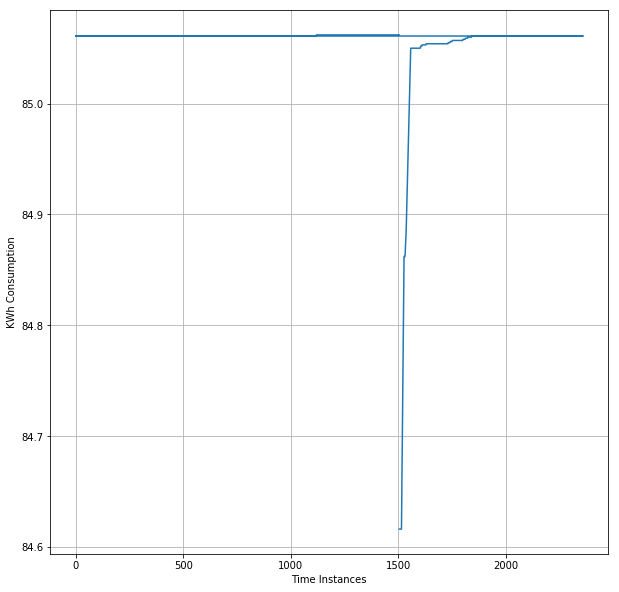

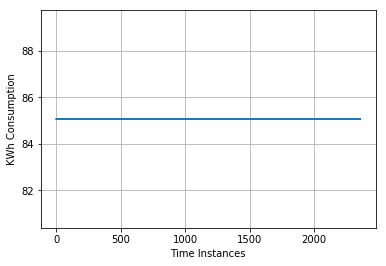

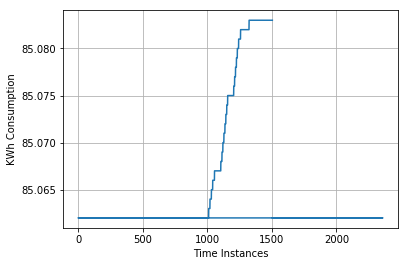

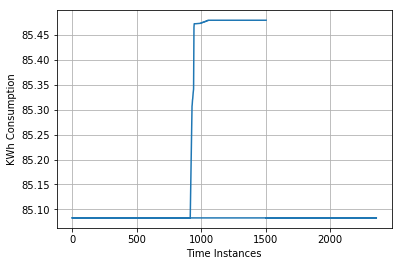

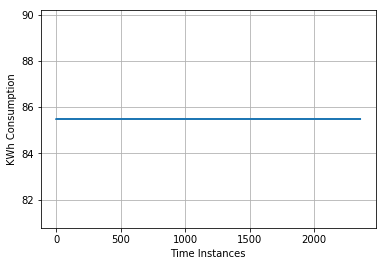

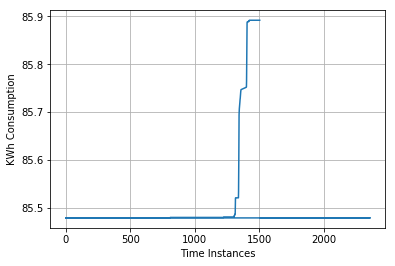

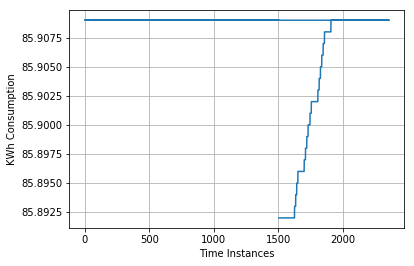

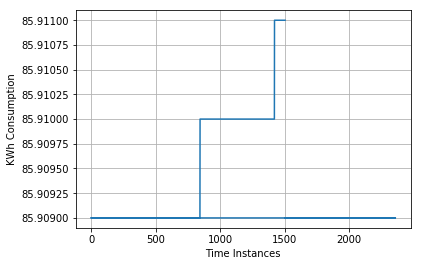

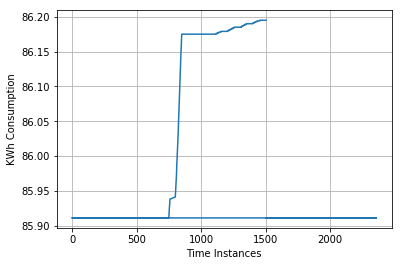

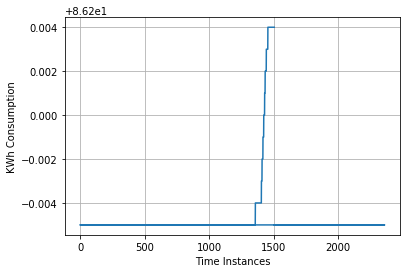

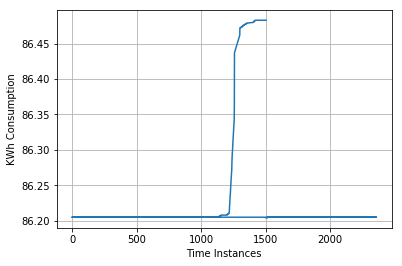

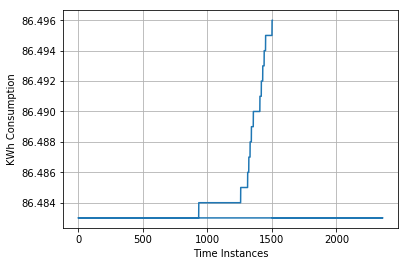

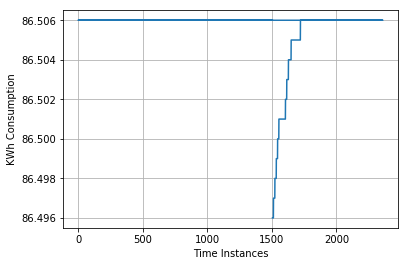

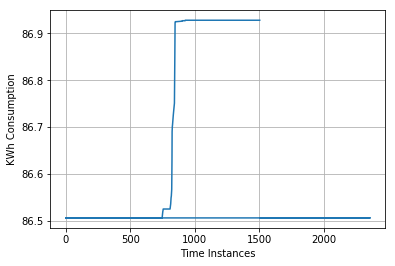

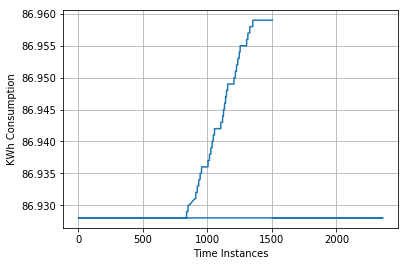

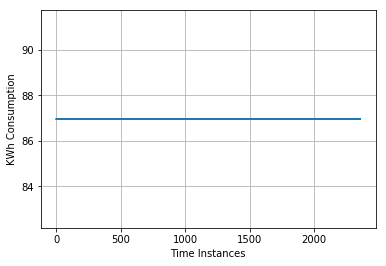

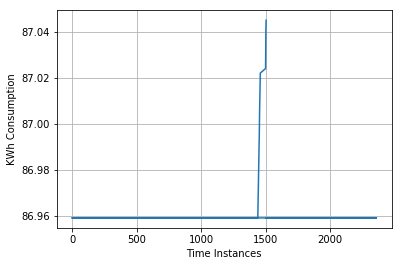

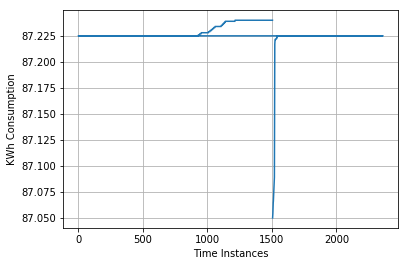

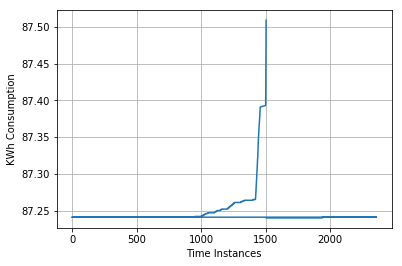

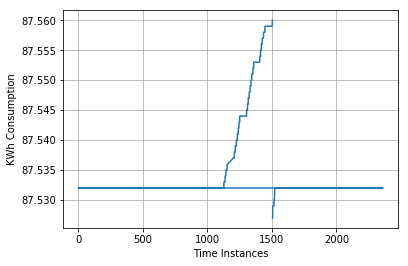

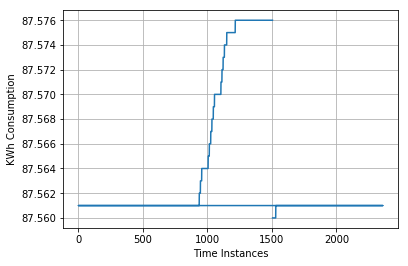

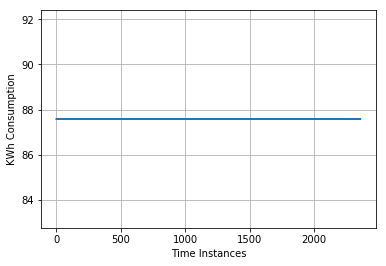

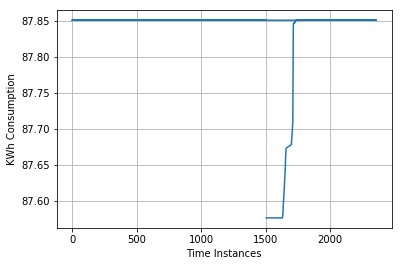

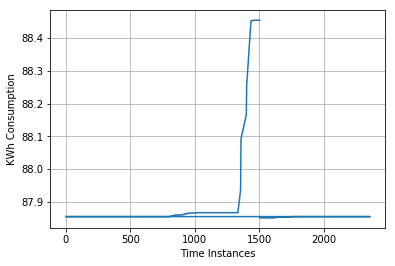

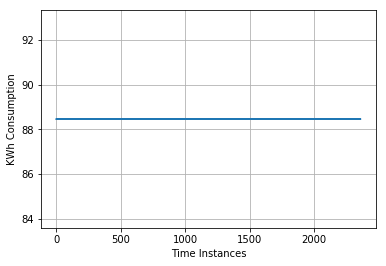

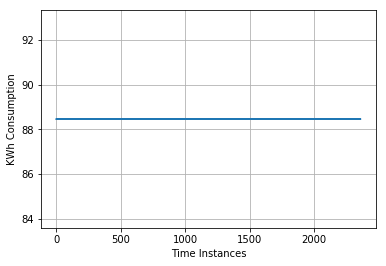

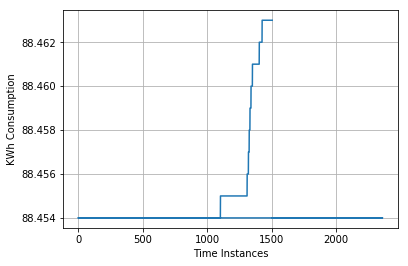

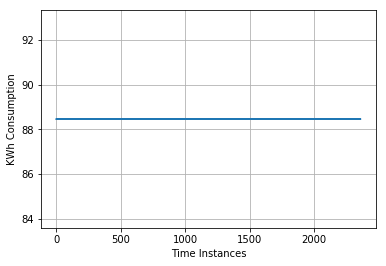

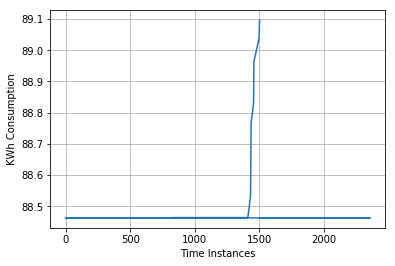

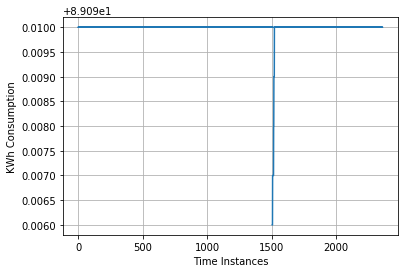

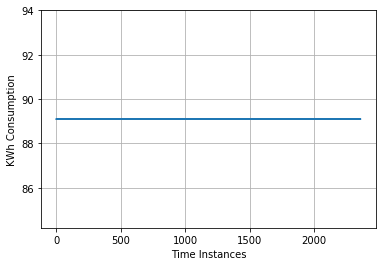

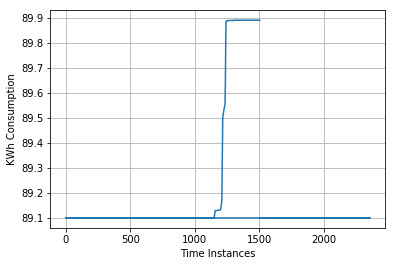

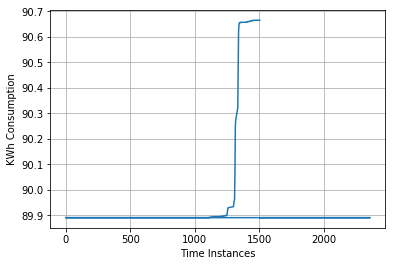

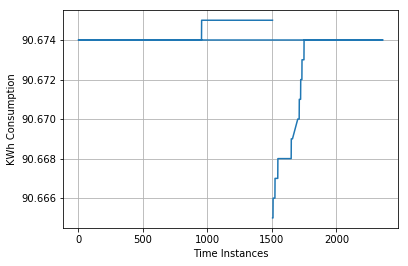

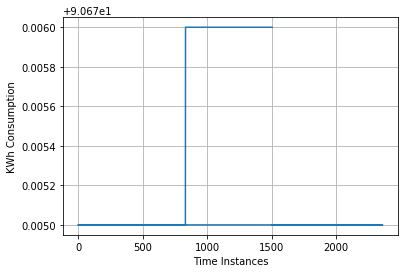

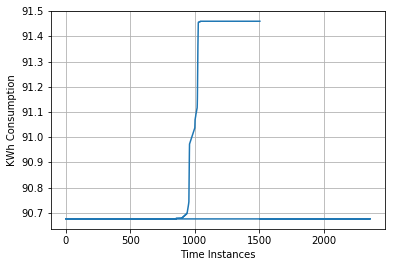

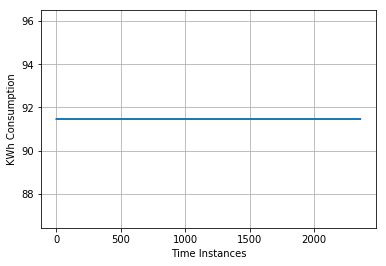

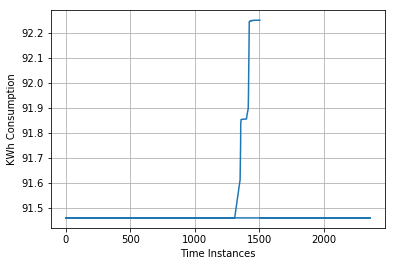

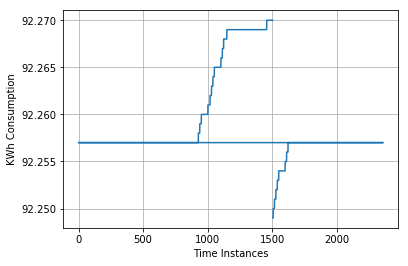

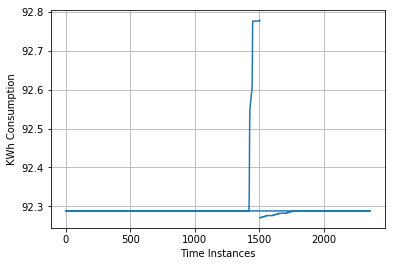

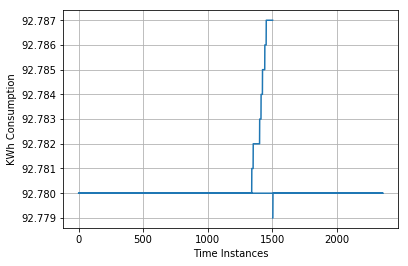

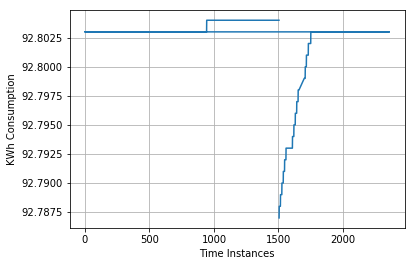

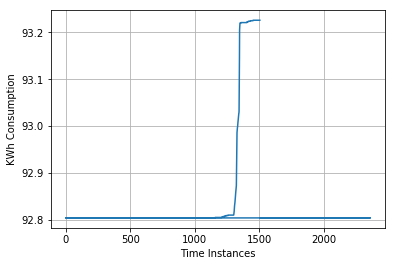

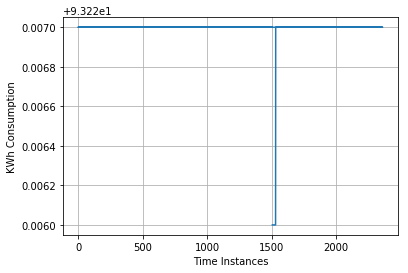

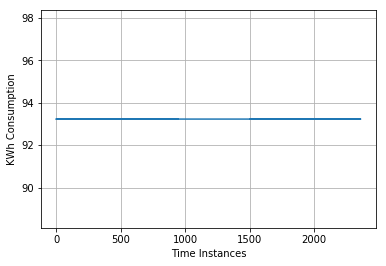

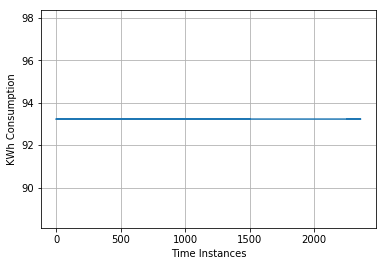

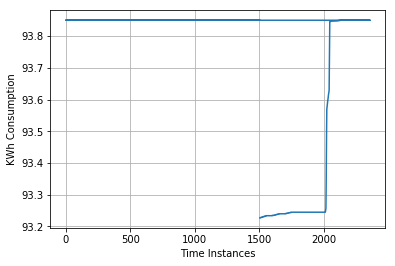

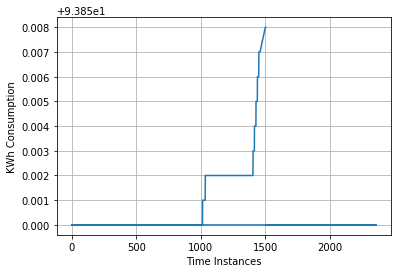

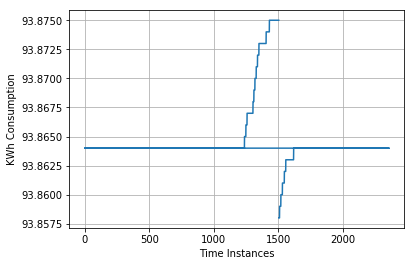

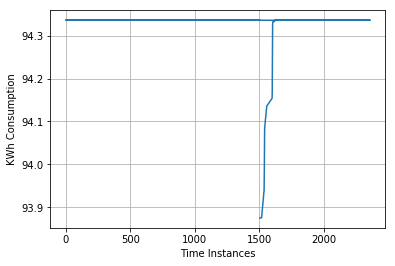

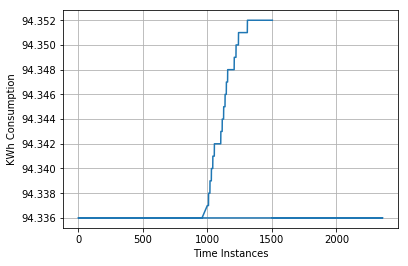

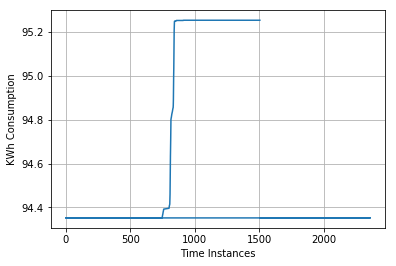

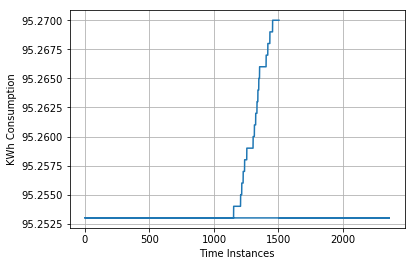

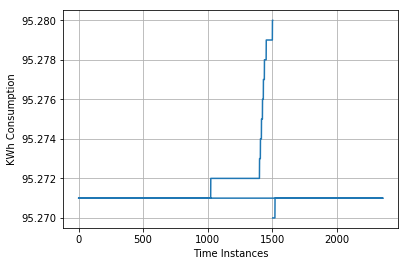

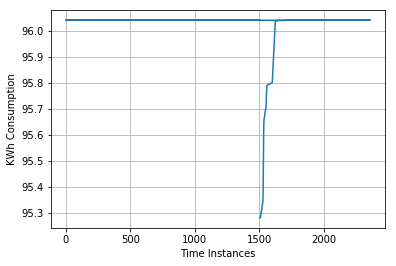

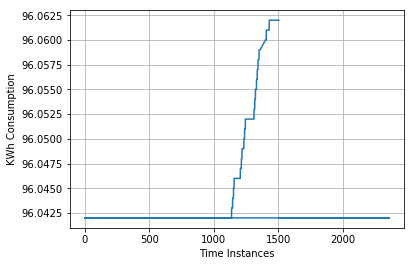

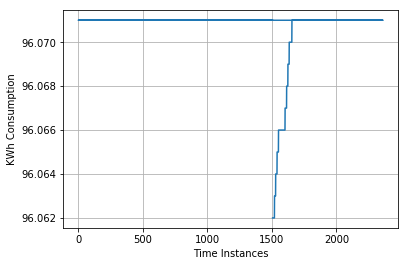

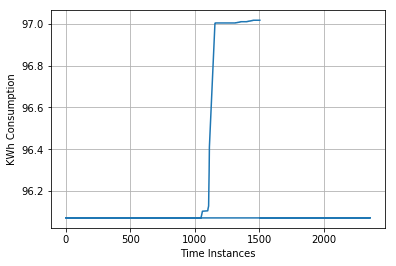

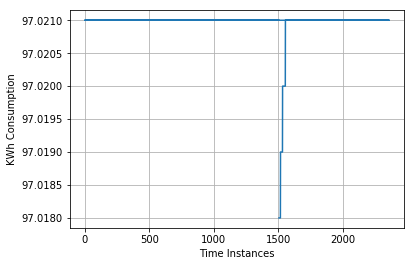

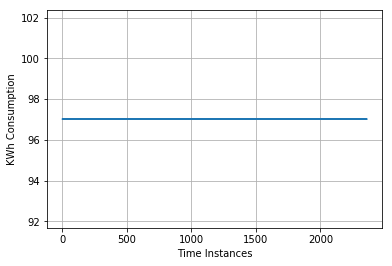

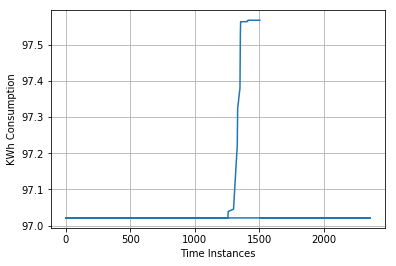

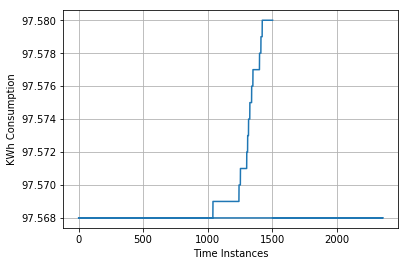

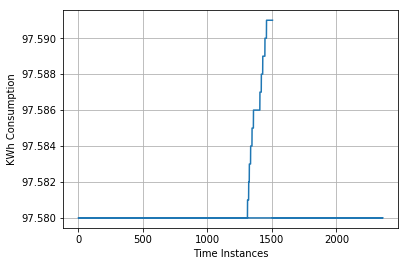

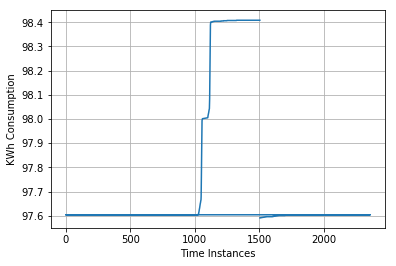

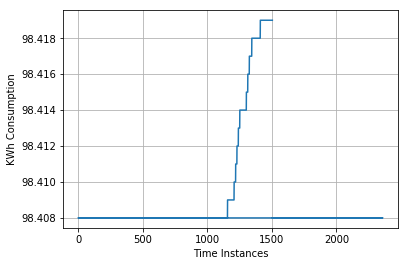

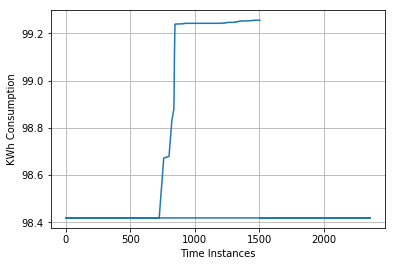

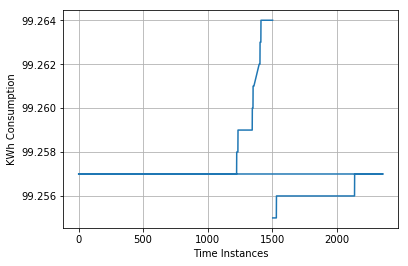

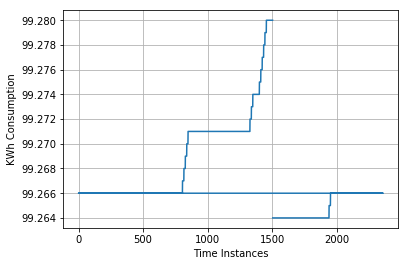

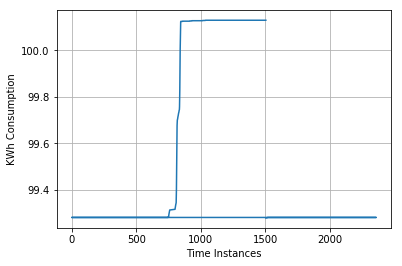

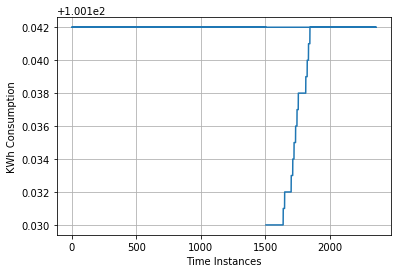

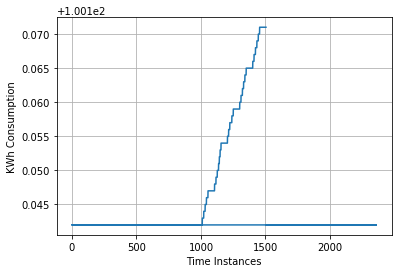

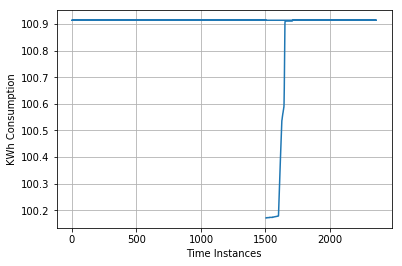

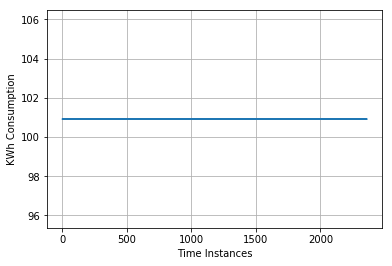

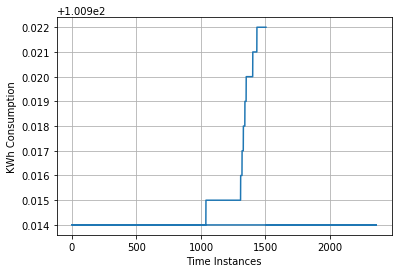

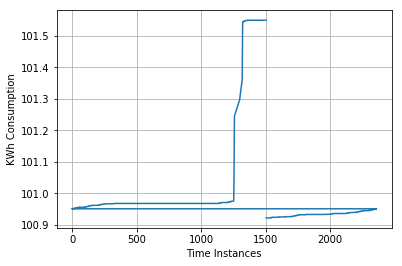

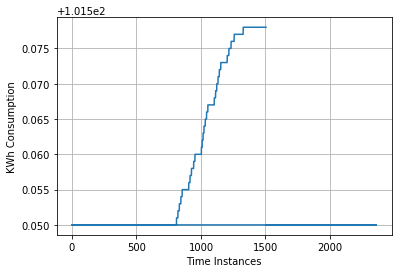

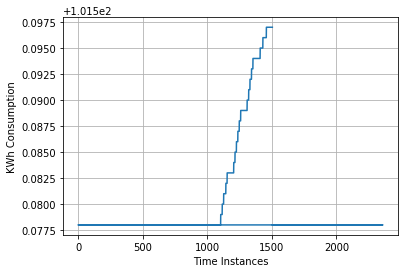

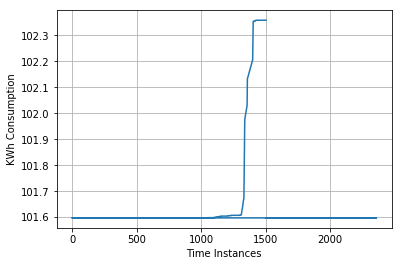

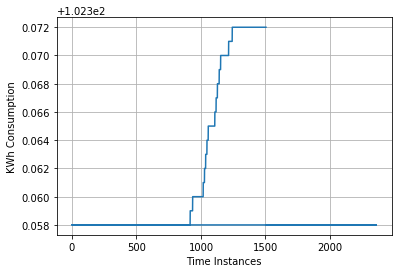

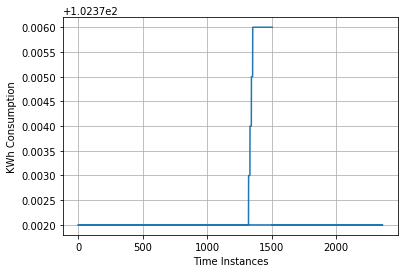

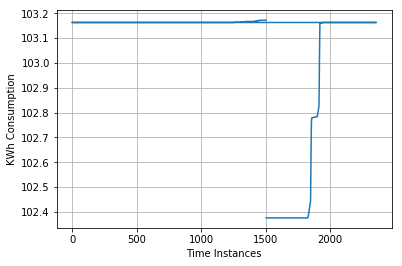

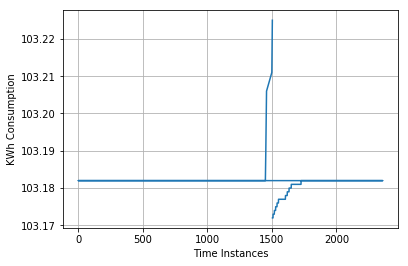

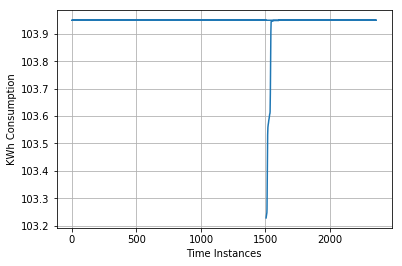

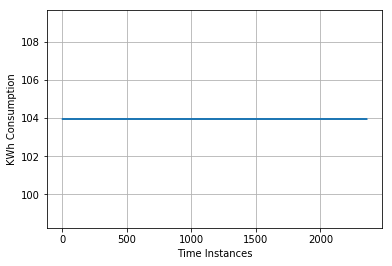

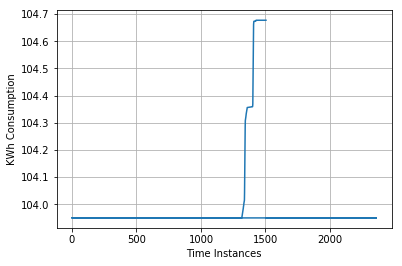

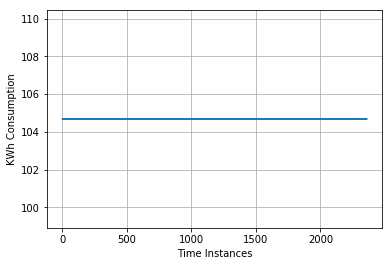

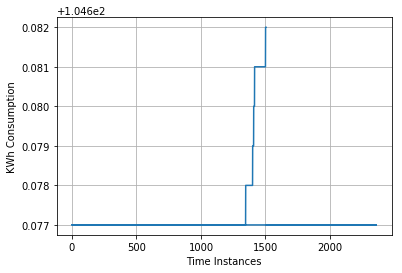

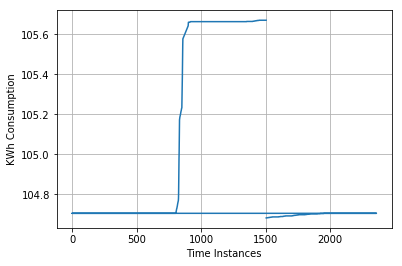

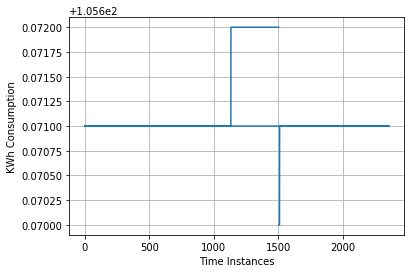

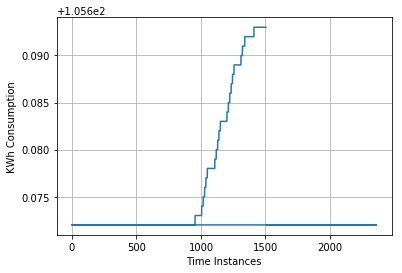

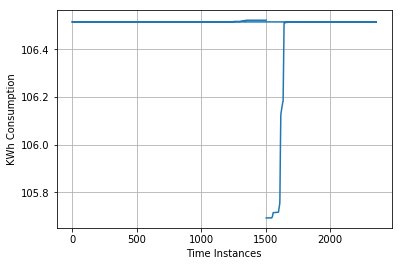

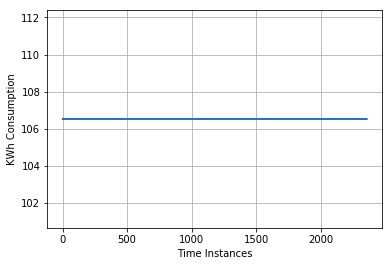

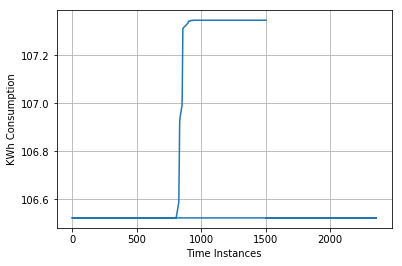

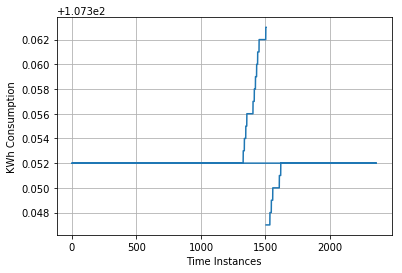

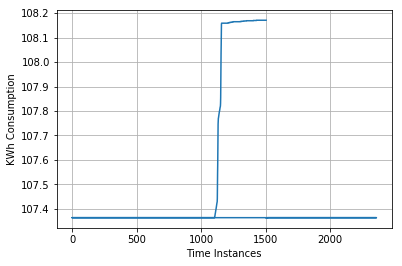

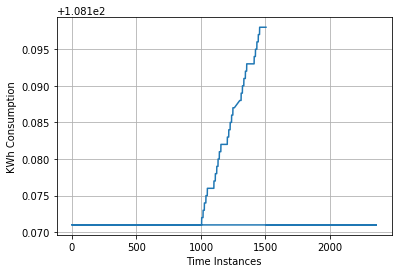

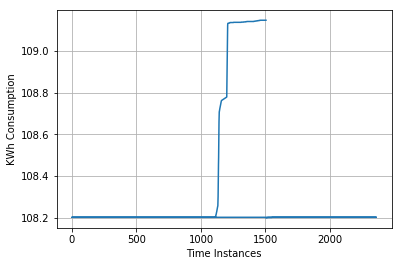

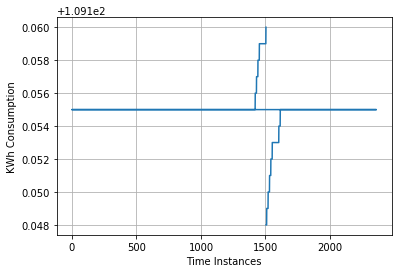

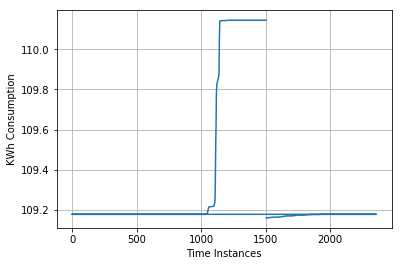

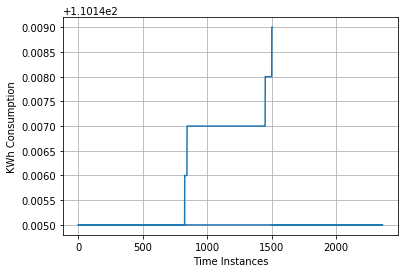

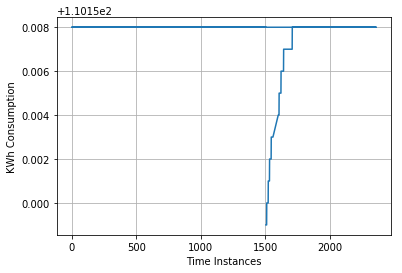

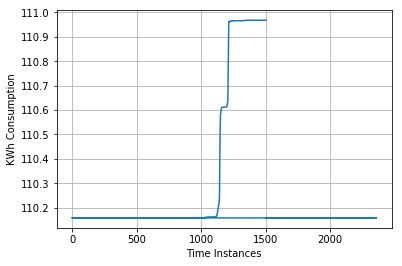

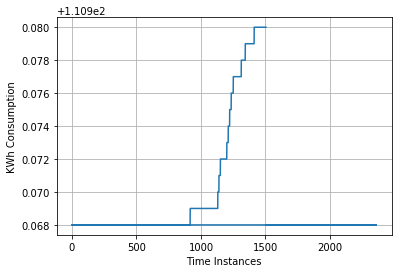

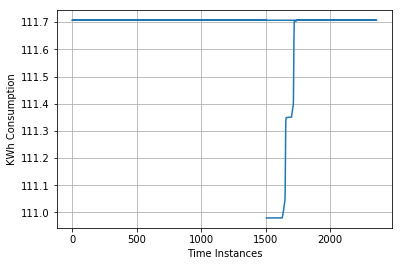

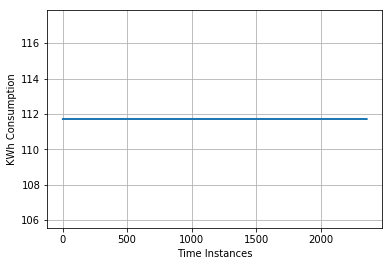

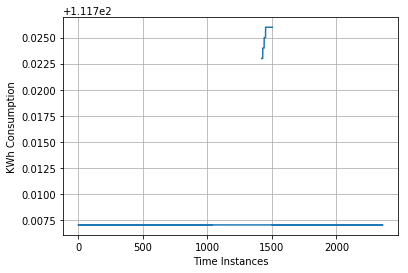

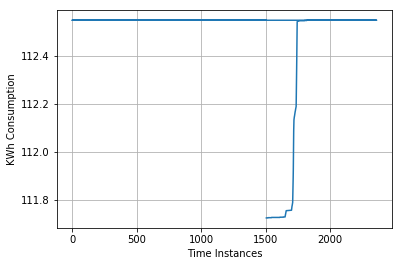

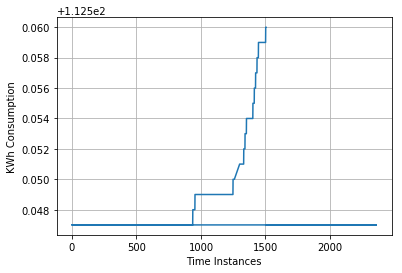

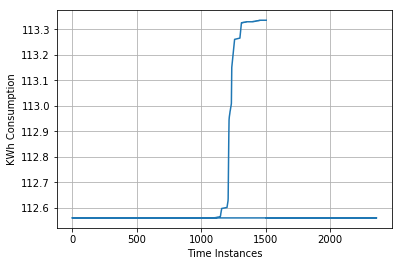

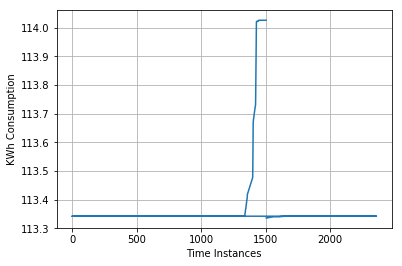

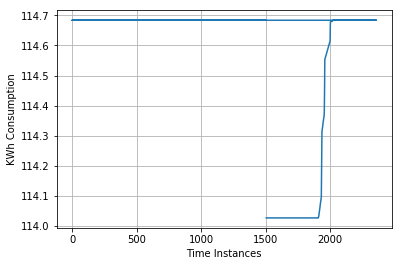

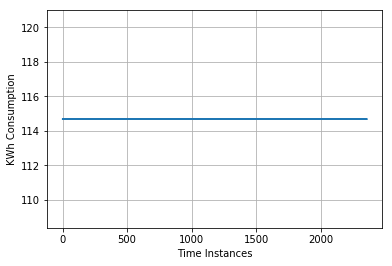

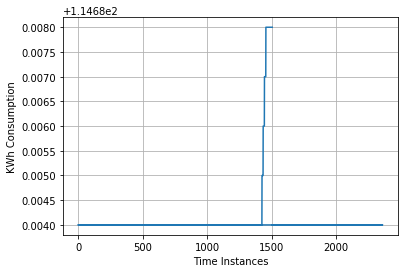

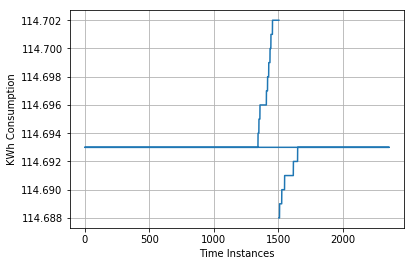

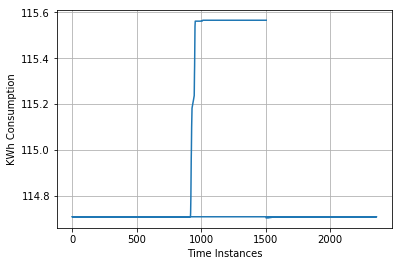

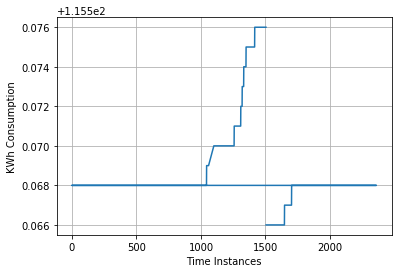

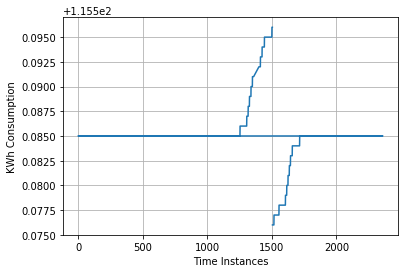

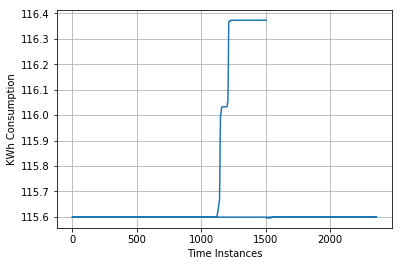

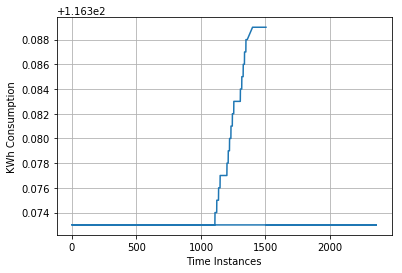

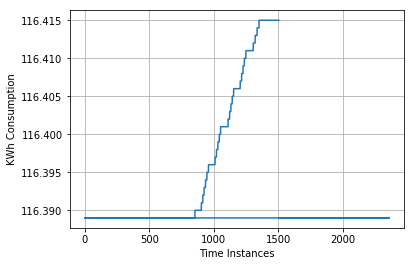

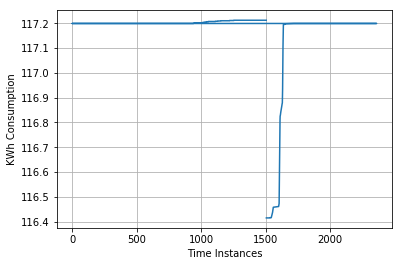

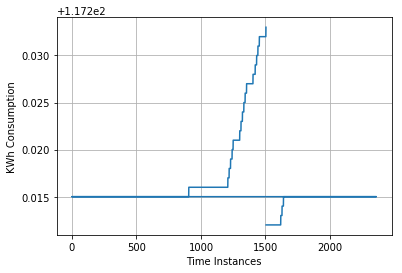

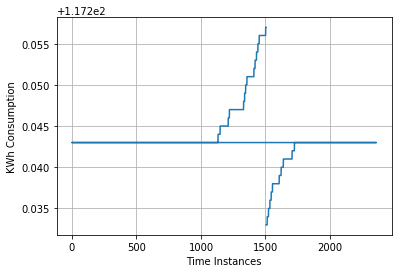

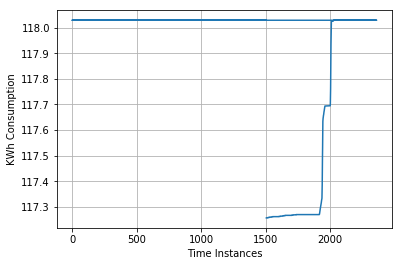

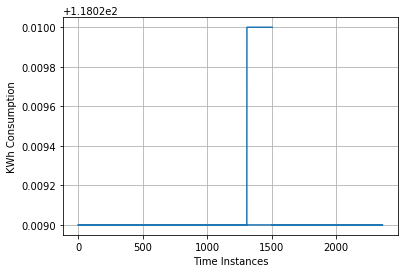

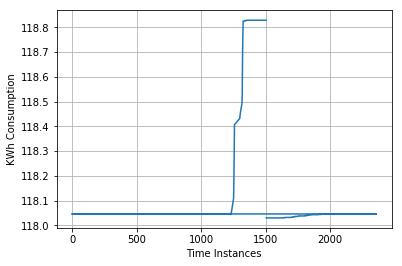

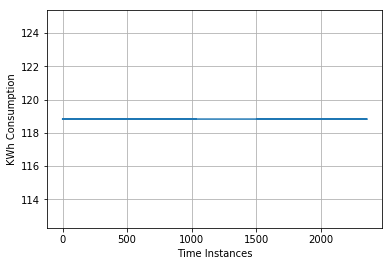

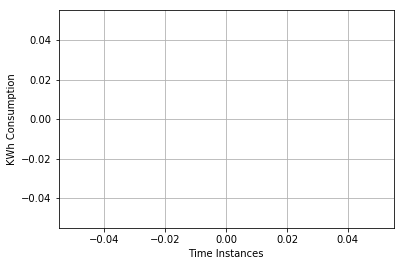

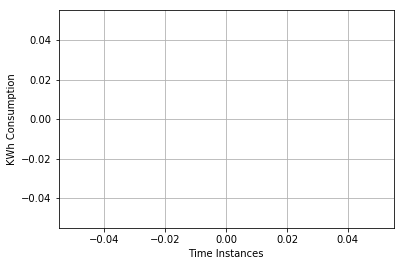

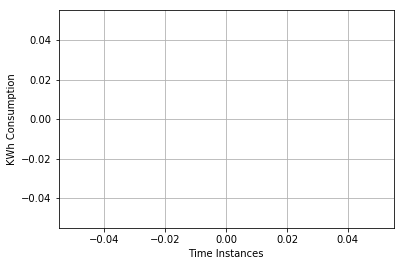

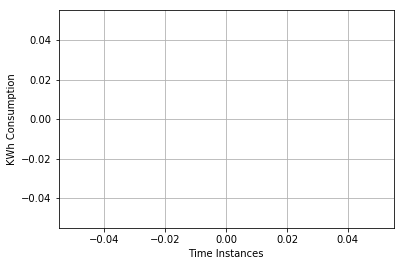

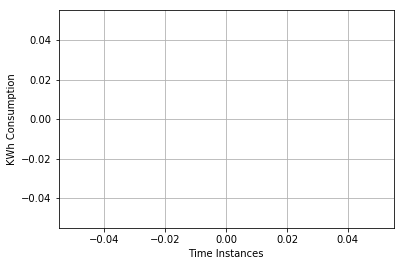

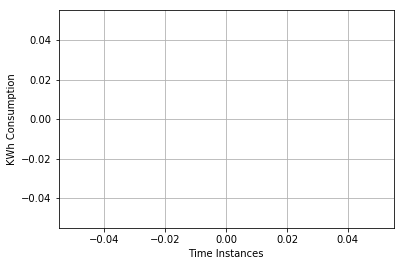

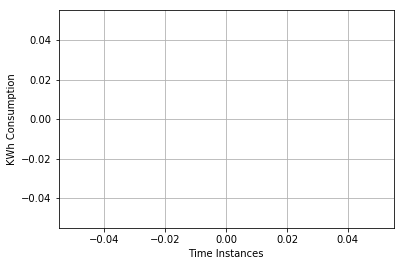

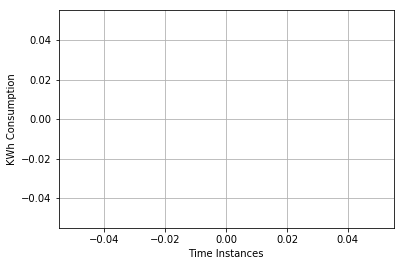

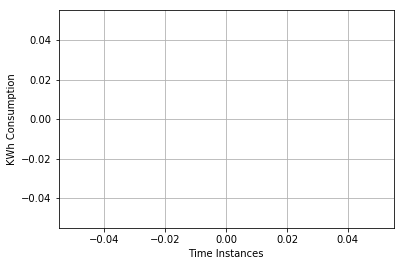

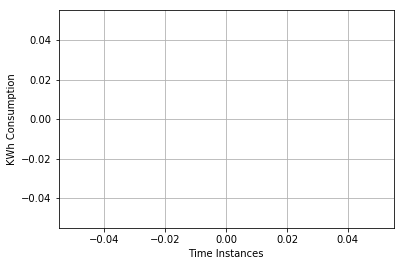

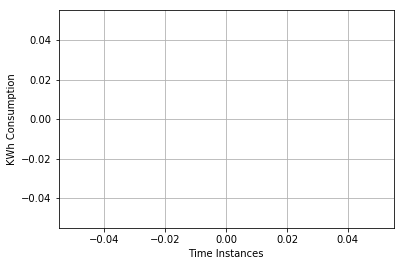

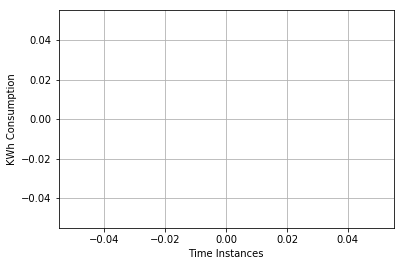

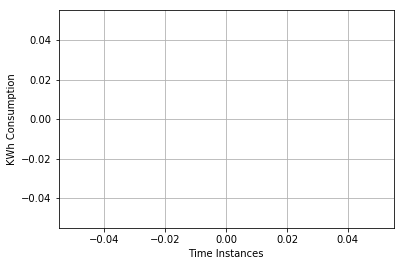

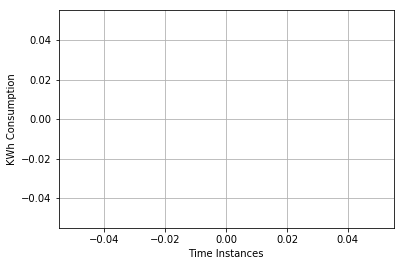

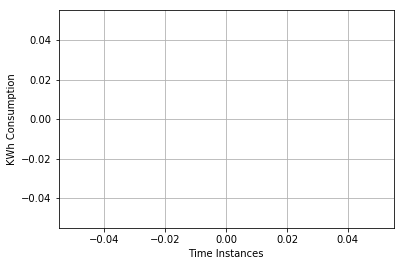

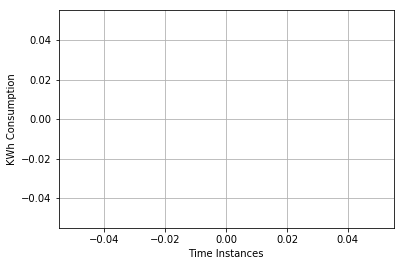

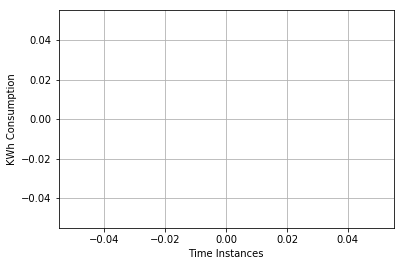

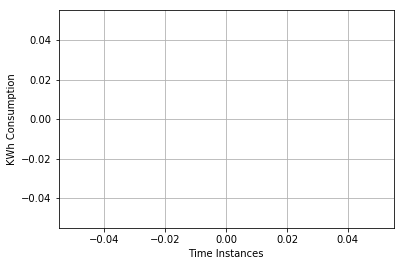

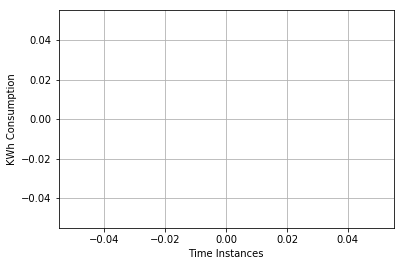

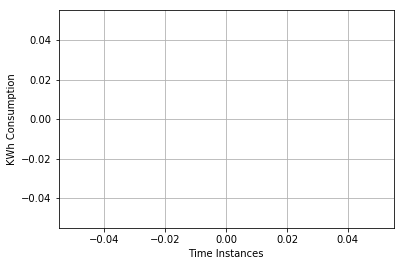

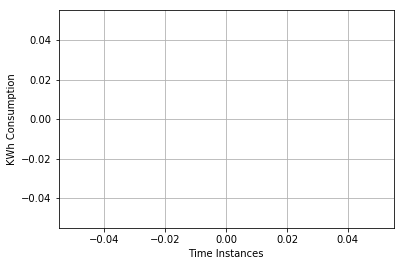

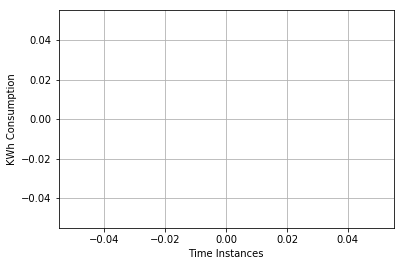

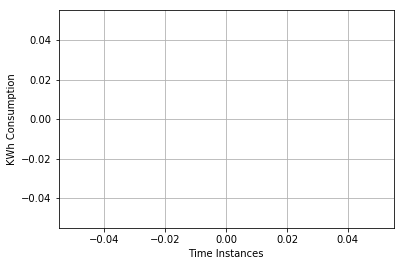

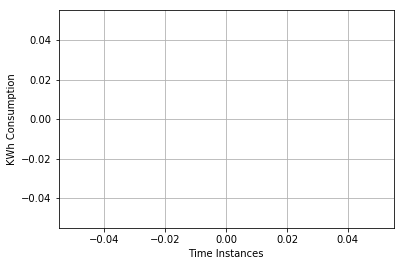

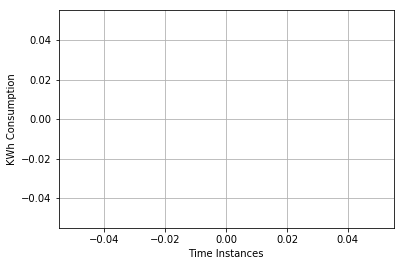

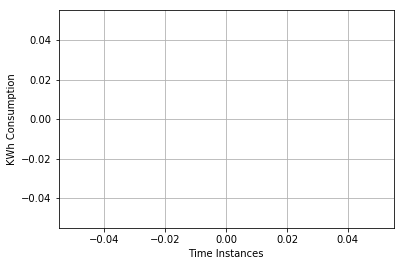

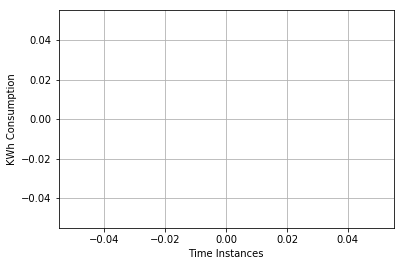

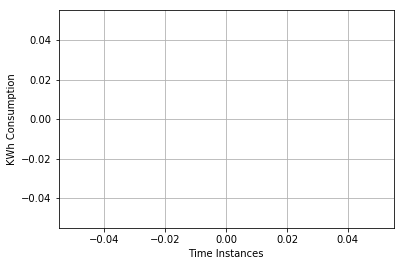

ValueError: x and y must have same first dimension, but have shapes (1440,) and (1236,)

In [24]:
plt.figure(figsize=(10,10))
x = d1_time[:1440]
i=1440
prev_i=0

while ( i <= (i+1440 , d1.shape[0]) ):
    y = d1.values[prev_i:i,2]
    plt.plot(x,y)
    plt.grid(True)
    plt.ylabel("KWh Consumption")
    plt.xlabel("Time Instances")
    #plt.xticks(np.arange(min(x),max(x),20))
    #plt.yticks(np.arange(min(y),max(y),0.05))
    prev_i=i
    plt.show() 
    i+=1440   

In [ ]:
'''
Data available from 2016-04-24 onwards. Check how many nulls present
from here onwards.
'''
d60_2016_04 = pd.DataFrame( d60.values[4893:] )
d60_2016_04.columns = d60.columns
del d60_2016_04['interpolated_values']
print d60_2016_04.shape

'''Function that returns the number of null values present in each row
till the end. Takes three parameters, start, end and the dataframe on 
which to apply this.
'''

def rows_null_check(start,end,d):
    i=start
    index=[]
    
    while (i<end):
        temp = np.sum(np.sum((pd.DataFrame(d.values[i]).isnull() )))
        if temp > 0:
            index.append(i)
        temp=0
        i+=1
    
    return (index)

'''Index "list" contains the row numbers of the dataframe that contain 
null values.
'''        

rows_null_check(0,d60_2016_04.shape[0],d60_2016_04)     

In [ ]:
d60.values[8275]

In [ ]:
'''
Checking for null values from index 8126 onwards, i.e. from the timestamp
2016-09-06 onwards. (Timestamp for which corresponding 1_min data is available.)
'''
d60_2016_09 = pd.DataFrame(d60.values[8275:])
print d60_2016_09.shape
d60_2016_09.columns = d60.columns
del d60_2016_09['interpolated_values']
index = rows_null_check(0,d60_2016_09.shape[0],d60_2016_09)


In [ ]:
print len(index),"\n\n"

for i in range(len(index)):
    print d60.values[index[i]+8126],"\n\n"

In [ ]:
print len(rows_null_check(0,d60_2016_04.shape[0],d60_2016_04))

In [ ]:
d60_2016_09.tail(4)

In [ ]:
d1.tail(2)

In [ ]:
d60_2016_04.head(3)

In [ ]:
d60.columns

In [ ]:
del d3[d3.columns[d3.columns.shape[0]-1]]
d3.head()

In [ ]:
#Find the index of the first row that is not null.
def first_nonnull_location(d):
    for i in range(d.shape[0]):
        if np.sum(np.sum(pd.DataFrame(d.values[i]).isnull())) == 0:
            return i
        
def first_null_location(d):
    for i in range(d.shape[0]):
        if np.sum(np.sum(pd.DataFrame(d.values[i]).isnull())) != 0:
            return i        
        
def last_null_location(d):
    for i in range(d.shape[0]-1,0,-1):
        if np.sum(np.sum(pd.DataFrame(d.values[i]).isnull())) != 0:
            return i                

In [ ]:
print first_null_location(d3)

In [ ]:
start = first_nonnull_location(d60)

In [ ]:
del d60['interpolated_values']

In [ ]:
#How many NULLs present from 2016-04 to 2016-09.
d60_2016_04_09 = pd.DataFrame(d60.values[start:8126])
d60_2016_04_09.columns = d60_2016_04.columns
print (d60_2016_04_09.columns)

In [ ]:
d60_2016_04_09.tail(4)

In [ ]:
#Find how many nulls exist in this range.
print len(rows_null_check(0,d60_2016_04_09.shape[0],d60_2016_04_09))

In [ ]:
d60_2016_04_09.shape

In [ ]:
#Find how many nulls exist in this range.
index = (rows_null_check(0,d60.shape[0],d60))

In [ ]:
print len(index)
# Get the index from the list, of the element '8275'
print len( index[index.index(8275):] ) 

In [ ]:
index

In [ ]:
d60.values[4893]

In [ ]:
d60.values[8274]

In [ ]:
print len( rows_null_check(4893,8274,d60) ) 

In [ ]:
d60_cont1 = pd.DataFrame(d60.values[4893:8275])
print d60_cont1.shape

In [ ]:
print first_null_location(d60_2016_09)

In [ ]:
d60_2016_09.head()

In [ ]:
d60.values[8275]

In [ ]:
print (first_nonnull_location(d3))

In [ ]:
#Get the indices of the NULL rows from d60_2016_09
index_conc = rows_null_check(0,d60_2016_09.shape[0],d60_2016_09)

In [ ]:
print index_conc[-1]

In [ ]:
del d1['interpolated_values']

In [ ]:
'''Extract the same range from the other csv's'''
d1_2016_09 = pd.DataFrame(d1.values[8935:])

In [ ]:
d1.columns

In [ ]:
d1_2016_09.columns = d1.columns

In [ ]:
'''Get the hours into a list from d60_2016_09 which contain NULL values'''
null_hours = []

for i in range(len(index_conc)):
    #Extract the time-stamp alone for the NULL rows.
    null_hours.append(d60_2016_09.values[index_conc[i]][0])
    
print index_conc[i]
print d60_2016_09.values[index_conc[i]]

In [ ]:
len(index_conc)
print len(null_hours)
print null_hours[-1]

In [ ]:
d1_2016_09.head()

In [ ]:
'''Step through the 1min csv checking only those values for which the corresponding hour is NULL'''
it = 0
l=[]

for i in range(len(null_hours)):
    temp = d1_2016_09[d1_2016_09[d1_2016_09.columns[0]].str.contains(null_hours[i][:13])]
    #Now, get the number of non-null rows per each hour.
    l.append( len(rows_null_check(0,temp.shape[0],temp)) )
    #print l[i],"\n"
        

In [ ]:
d1_2016_09[d1_2016_09.isnull().any(axis=1)]

In [ ]:
null_hours[len(null_hours)-1]

In [ ]:
for i in range(2,0,-1):
    print i

In [ ]:
last_null_location(d60_2016_09)

In [ ]:
d60_2016_09.values[3591]

In [ ]:
d60_2016_09.head()

In [ ]:
print last_null_location(d60)

In [ ]:
d60.values[11866]

In [ ]:
d60_2016_09.tail()

In [ ]:
11866-8275

In [ ]:
null_hours[-1]

In [ ]:
d1_index = rows_null_check(0,d1_2016_09.shape[0],d1_2016_09)

In [ ]:
d1_2016_09.shape

In [ ]:
len(d1_index)

In [ ]:
d60_2016_09.isnull().sum()

In [ ]:
d1_2016_09

In [ ]:
index_conc

In [ ]:
d1_2016_09[d1_2016_09[d1_2016_09.columns[0]].str.contains(null_hours[index_conc.index(2001)][:13])]

In [ ]:
'''
Select a subset of the features and then see how many NULL rows result.
'''
del d1_2016_09['DE_KN_residential4_grid_export']
del d1_2016_09['DE_KN_residential4_pv']
del d1_2016_09['DE_KN_residential4_refrigerator']
#del d1_2016_09['DE_KN_residential4_dishwasher']
#del d1_2016_09['DE_KN_residential4_freezer']

del d60_2016_09['DE_KN_residential4_grid_export']
del d60_2016_09['DE_KN_residential4_pv']
del d60_2016_09['DE_KN_residential4_refrigerator']
#del d60_2016_09['DE_KN_residential4_dishwasher']
#del d60_2016_09['DE_KN_residential4_freezer']

In [ ]:
d60_2016_09.columns

In [ ]:
#Get the indices of the NULL rows from d60_2016_09
index_conc_fs1 = rows_null_check(0,d60_2016_09.shape[0],d60_2016_09)

In [ ]:
def null_hours_func(d,index_conc):
    null_hours = []
    for i in range(len(index_conc)):
        #Extract the time-stamp alone for the NULL rows.
        null_hours.append(d.values[index_conc[i]][0])
    return null_hours

def null_hours_calc(d,null_hours):
    l=[]
    for i in range(len(null_hours)):
        temp = d[d[d.columns[0]].str.contains(null_hours[i][:13])]
        l.append( len(rows_null_check(0,temp.shape[0],temp)) )
    return l

In [ ]:
null_hours_fs1 = null_hours_func(d60_2016_09,index_conc)
l_fs1 = null_hours_calc(d1_2016_09,null_hours_fs1)

In [ ]:
len(l_fs1)

In [ ]:
d1_2016_09[d1_2016_09[d1_2016_09.columns[0]].str.contains(null_hours[0][:13])]

In [ ]:
#Get the indices of the NULL rows from d60_2016_09
'''
Removing the feature 'Refrigerator'.
Now, if you print 'l_fs2' you can see that there are a few clusters where there '0' rows which are NULL for that hour.
=> 'Refrigerator' does play a role in NULLs.
Similarly trying out for the others ( 'DishWasher' and 'Freezer' ) below as well.
'''
index_conc_fs2 = rows_null_check(0,d60_2016_09.shape[0],d60_2016_09)
null_hours_fs2 = null_hours_func(d60_2016_09,index_conc_fs2)
l_fs2 = null_hours_calc(d1_2016_09,null_hours_fs2)

In [ ]:
len(l_fs2)

In [ ]:
index_conc_fs3 = rows_null_check(0,d60_2016_09.shape[0],d60_2016_09)
null_hours_fs3 = null_hours_func(d60_2016_09,index_conc_fs3)
l_fs3 = null_hours_calc(d1_2016_09,null_hours_fs3)

In [ ]:
len(l_fs3)

In [ ]:
d1_2016_09[d1_2016_09[d1_2016_09.columns[0]].str.contains(null_hours[0][:13])]

In [ ]:
index_conc_fs4 = rows_null_check(0,d60_2016_09.shape[0],d60_2016_09)
null_hours_fs4 = null_hours_func(d60_2016_09,index_conc_fs4)
l_fs4 = null_hours_calc(d1_2016_09,null_hours_fs4)

In [ ]:
len(l_fs4)

In [ ]:
index_conc_fs4[0]

In [ ]:
d1_2016_09[d1_2016_09[d1_2016_09.columns[0]].str.contains(null_hours_fs4[0][:13])]['DE_KN_residential4_grid_import'].mean()

In [ ]:
'''
What is left to be done, is that see what indices that have NULL values in 60_min.csv have corresponding non-NULL 
values in the 1_min.csv.
'''
for i in range(2,len(d1_2016_09.columns),1):
    #print d1_2016_09.columns[i],"\n"
    print d1_2016_09[d1_2016_09[d1_2016_09.columns[0]].str.contains(null_hours_fs4[0][:13])][d1_2016_09.columns[i]].mean(),"\n"

In [ ]:
null_hours_fs4[0]